In [ ]:
# VISUALIZE WORD EMBEDDINGS USING T-SNE
# --------------------------------------------------
#
# Original code from https://github.com/MarkRademaker/DCWEB-SOBA
#
# Adapted by Jonathan IJbema
#
#
# Visualize word embeddings from language models using T-SNE.
# 2. Load word embeddings using getWordEmbeddingsT5 or getWordEmbeddingsBERT
# 3. Make lists of polarity words needed for analysis
# 4. Process data and add labels to review sentences
# 5. Display word vectors on 2 dimensional coordinate system

In [ ]:
import pprint
import pandas as pd
import json
words = []
vectors = []
sentenceIDs = []

#@title File path
#@markdown Choose file path for dataset.

file_path = 'output.txt' #@param {type:"string"}

file = open(file_path, 'r')
total = file.read()
total = total[1:-2]
wordAr = total.split('}, "')
counter = 0
for ar in wordAr:
    counter+=1
    arr = ar.split('{"word": "')
    arr1 = arr[1].split('", "vector": [')
    arr2 = arr1[1].split(', "sentence id": ')
    
    stringg = arr1[0]
    vecs = arr2[0].split('],[')
    sentenceID = int(arr2[1])+1
    for v in vecs:
        words.append(stringg)
        list1 = list(v.split(','))
        veclist = []
        for item in list1:
            if item[-1] == ']':
                item = item[:-1]
            if item[-2:] == ']]':
                item = item[:-2]
            if item[-3:] == ']]}':
                item = item[:-3]
            veclist.append(float(item))
        vectors.append(veclist)
    sentenceIDs.append(sentenceID)
print("A list of the clustered vectors is made with a list with corresponding labels")
print("Number of words contained in the Json: ", counter)
print("Number of vectors contained in the Json: ", len(vectors))

A list of the clustered vectors is made with a list with corresponding labels
Number of words contained in the Json:  350
Number of vectors contained in the Json:  350


In [ ]:
#Makes lists of vectors necessary for analysis 
listGenPosWords=[
    'good','decent','great','tasty','fantastic','solid','yummy','terrific',
]

listGenNegWords=[
    'bad','awful','horrible','terrible','poor','shitty','horrid'
]

listGenPosWordsWrong=[
    'fantastic','great','terrific', 
    'good','great','awesome',
    'nice','excellent',
    'right','wonderful',              
    'enjoyable','enjoy','love','perfectly',
    'perfect','happy','Fascinating',
    'appreciated','amazing','delightful','surprising',
    'fine', 'best', 'beautiful'
]
listGenNegWordsWrong=[
    'horrible','bad','hate','unpleasant',
    'lousy','awful','worst','terrible',
    'poorly','poor','crappy','underwhelming',
    'overvalued', 'unsatisfactory'
]

listType2PosWords = [
    'Classy','Cozy','Warm','Lively',
    'Beautiful','Charming','Famous',
    'Popular','admirable','inviting','Quick',
    'Rapid','Better','Gentle','Generous',
    'Friendly','Welcoming','Admirable','inviting','Fast',
    'Culinary','Innovative','Sustainable',
    'Affordable','Payable','fair','Colorful','Garnished',
    'Delicious','Fresh','Addictive',
    'Finger-licking','Renowned','Masterful',
    'Must-have','Nutritious','tasty','Organic','Juicy','Recommend',
    'Recommended','Payable','Inexpensive',
    'Fair','Delicious',
    'Fresh','Appetizing','Exotic',
    'Refreshing','yummy','Mouthwatering'
]
listType2NegWords = [
    'Cold','Silent','disturbing','boring',
    'Ugly','Miserable','crowded','Hard','Slow','Unfriendly','Lousy','unreasonable',
    'Cheap', 'Expensive','high', 'Disgusting','Gross','Spoiled',
    'Underripe','Overcooked','Undercooked','Greasy','Unhealthy',
    'Overpriced','Pricy','Plain','Canned'
]
listType3Words = ['Turkey','pizza','italy']




In [ ]:
genericpos=[]
genericneg=[]
for index,word in enumerate(words):
    for pos in listGenPosWordsWrong:
        if word == pos.lower():
            #genericpos.append(string1)
            genericpos.append([word,vectors[index]])
            break
    for neg in listGenNegWordsWrong:
        if word == neg.lower():
            #genericneg.append(string1)
            genericneg.append([word,vectors[index]])
            break
            
type2PosWords = []
type2NegWords = []
for index,word in enumerate(words):
    for pos in listType2PosWords:
        if word == pos.lower():
            #genericpos.append(string1)
            type2PosWords.append([word,vectors[index]])
            break
    for neg in listType2NegWords:
        if word == neg.lower():
            #genericneg.append(string1)
            type2NegWords.append([word,vectors[index]])
            break
type3Words = []
for index,word in enumerate(words):
    for pos in listType3Words:
        if word == pos.lower():
            #genericpos.append(string1)
            type3Words.append([word,vectors[index],sentenceIDs[index]])
            break

In [ ]:
#### import important methods used
!pip install seaborn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns


In [ ]:
# FOR GENERIC -> TYPE 1
wordsForLab = []
vectors1 = []
for i in genericpos:
    wordsForLab.append(i[0])
    vectors1.append(i[1])
numpos = len(vectors1)
for i in genericneg:
    wordsForLab.append(i[0])
    vectors1.append(i[1])
labels = []
i = 0
while i<len(genericpos):
    labels.append('green')
    i+=1
j = 0
while j<len(genericneg):
    labels.append('red')
    j+=1
print(len(vectors1),numpos,len(vectors1)-numpos)

# FOR ASPECT SPECIFIC -> TYPE 2
wordsForLab2 = []
vectors2= []
labels2 = []
#for i in type2Words:
 # name =  i[0]# + ',' + str(i[2])
#  wordsForLab2.append(name)
#  vectors2.append(i[1])

  #ASSIGNING LABELS TO SPECIFIC WORDS
#  if i[2] < 6:
      #labels3.append('green')
#  elif i[2] >5 :
      #labels3.append('red') 
j = 0
print(labels2)
print(len(wordsForLab2))
# FOR ASPECT SPECIFIC -> TYPE 3
wordsForLab3 = []
vectors3= []
labels3 = []
name = ""
for i in type3Words:
  #ASSIGNING LABELS TO SPECIFIC WORDS
  if (i[2] <7)or (i[2]==13):
    labels3.append('black')
    if i[2]<7:
      name = "Turkey#B"  #i[0] + "FOOD" + str(i[2])
    else :
      name = "Italy"
    wordsForLab3.append(name)
    vectors3.append(i[1])
  elif (i[2]>6)or (i[2]==14) :
    labels3.append('silver')
    if i[2]>6 and i[2]<13:
      name = "Turkey#A"  #i[0] + "FOOD" + str(i[2])
    elif i[2] == 14 :
      name = "Pizza"
    wordsForLab3.append(name)
    vectors3.append(i[1])
j = 0

32 21 11
[]
0
[]
0


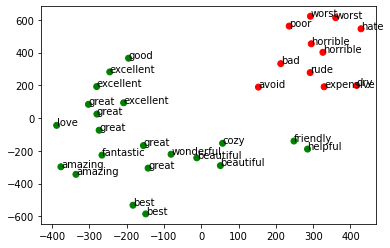

In [ ]:
#Make visualisation of word embeddings using t-SNE

#@title Polysemy or polarity 
#@markdown Choose whether to show polysemy or polarity dispersion.
sentiment = True #@param {type:"boolean"}

tsne = TSNE(n_components=2,perplexity=5,n_iter=100000,random_state=42)

if sentiment:
  x_6_1 = tsne.fit_transform(vectors1)
  plt.scatter(x_6_1[:,0], x_6_1[:,1], color=labels)
  for i, txt in enumerate(wordsForLab):
    plt.annotate(txt, (x_6_1[i,0], x_6_1[i,1]))
else:
  x_5_1 = tsne.fit_transform(vectors3)
  plt.scatter(x_5_1[:,0], x_5_1[:,1], color=labels3)
  for i, txt in enumerate(wordsForLab3):
    plt.annotate(txt, (x_5_1[i,0], x_5_1[i,1]))